In [42]:
from pylab import *
from classy import *

## Iris

In [47]:
data=load_excel('data/iris.xls')
data_train,data_test=split(data,test_size=0.2)

iris.data 151 5
150 vectors of length 4
Feature names: 'petal length in cm', 'petal width in cm', 'sepal length in cm', 'sepal width in cm'
Target values given.
Target names: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
Mean:  [ 3.75866667  1.19866667  5.84333333  3.054     ]
Median:  [ 4.35  1.3   5.8   3.  ]
Stddev:  [ 1.75852918  0.76061262  0.82530129  0.43214658]
Original vector shape:  (150, 4)
Train vector shape:  (120, 4)
Test vector shape:  (30, 4)


In [56]:
len(data.targets),len(data_train.targets),len(data_test.targets),

(150, 120, 30)

In [48]:
C=Perceptron()

In [49]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print "Training time: ",timeit()

Time Reset
Training time:  0.0015230178833 seconds 


In [50]:
print "On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)
print "On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)

On Training Set: 72.5
On Test Set: 63.3333333333


In [58]:
C.coef_  # these are the weights

array([[-10. ,  -4.4,   2.7,   6.3],
       [ 15.2, -77.5,  20.3, -58.7],
       [ 80.8,  84.6, -47.4, -49.5]])

In [60]:
C=BackProp(hidden_layer_sizes = [4])

In [61]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print "Training time: ",timeit()

Time Reset
Training time:  0.0495491027832 seconds 


In [62]:
data_train.vectors.shape,data_train.targets.shape

((120, 4), (120,))

In [63]:
print "On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)
print "On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)

On Training Set: 99.1666666667
On Test Set: 90.0


In [65]:
W_inp_hid,W_hid_out=C.layers_coef_
print W_inp_hid
print "=="
print W_hid_out

[[ -1.88984907  -0.6514209    4.62546817  15.30821944]
 [  0.28018842  -0.1041773   13.21309481   3.12015757]
 [ -5.47417319  -1.77059877  -0.11965321  -1.40916101]
 [ -3.47660475  -0.43097459  -5.22797801  -7.26643135]]
==
[[  6.46881874e-01  -3.22161563e-01   2.15942084e-01]
 [ -5.99716281e-04   2.97163638e-01   4.59166224e-01]
 [ -1.51488524e+01  -8.01612026e+00   2.21104231e+01]
 [ -5.52527396e+00   4.89758063e+00   1.54858605e+00]]


## XOR Problem - Perceptron

In [66]:
data=load_csv('data/xor.csv')
print 
print data.vectors
print 
print data.targets

4 vectors of length 2
Feature names: 'p1', 'p2'
Target values given.
Target names: '0', '1'
Mean:  [ 0.5  0.5]
Median:  [ 0.5  0.5]
Stddev:  [ 0.5  0.5]

[[ 0.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  1.]]

[0 1 1 0]


In [67]:
C=Perceptron()

In [68]:
C.fit(data.vectors,data.targets)

In [69]:
print C.predict(data.vectors)

[0 0 0 0]


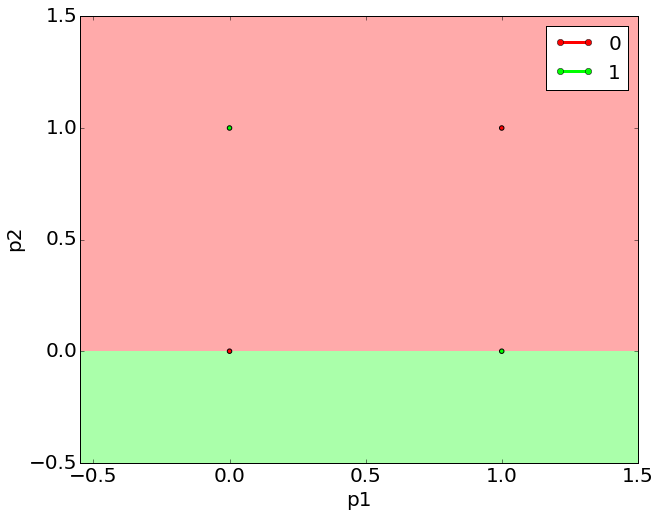

In [70]:
plot2D(data,classifier=C,axis_range=[-.55,1.5,-.5,1.5])

## XOR Problem - Backprop

In [71]:
data.vectors

array([[ 0.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  1.]])

In [72]:
data.targets

array([0, 1, 1, 0])

In [73]:
C=BackProp(hidden_layer_sizes = [4])

In [74]:
C.fit(data.vectors,data.targets)

In [75]:
print C.predict(data.vectors)

[0 1 1 0]


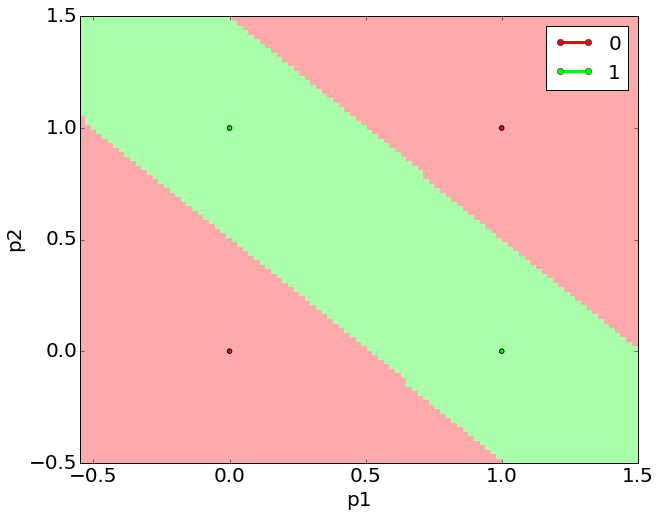

In [76]:
plot2D(data,classifier=C,axis_range=[-.55,1.5,-.5,1.5])

In [77]:
print data.vectors
print
print data.targets

[[ 0.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  1.]]

[0 1 1 0]


In [78]:
C._decision_scores(data.vectors)

array([[-9.09620746],
       [ 9.34536935],
       [ 9.24923974],
       [-9.847451  ]])

In [79]:
h,y=C.output(data.vectors)
print h
print 
print np.round(h)
print
print y

[[  8.373658     0.           0.           3.19110767]
 [  7.61597679   0.           0.           6.78801521]
 [  7.78506215   0.02551385   0.           6.93300842]
 [  7.02738094   4.13138112   0.          10.52991595]]

[[  8.   0.   0.   3.]
 [  8.   0.   0.   7.]
 [  8.   0.   0.   7.]
 [  7.   4.   0.  11.]]

[[-9.09620746]
 [ 9.34536935]
 [ 9.24923974]
 [-9.847451  ]]


In [80]:
C.layers_coef_

[array([[-0.75768121,  4.10586727,  0.22157329,  3.59690753],
        [-0.58859585,  4.13138119, -0.45931473,  3.74190075]]),
 array([[-3.03693258],
        [-9.14259159],
        [-0.85070409],
        [ 4.48734084]])]

## 8x8

In [81]:
vectors=eye(8)
targets=arange(1,9)
print vectors,targets

[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]] [1 2 3 4 5 6 7 8]


In [82]:
C=BackProp(activation='logistic',hidden_layer_sizes = [3],tol=1e-11)
C.fit(vectors,targets)
print C.predict(vectors)

[1 2 3 4 5 6 7 8]


In [83]:
h,y=C.output(vectors)

In [84]:
h

array([[ 0.98240006,  0.97535204,  0.95940313],
       [ 0.97376405,  0.97497754,  0.02427957],
       [ 0.02877091,  0.98619876,  0.06930237],
       [ 0.97776743,  0.0333104 ,  0.98037545],
       [ 0.97764769,  0.02977682,  0.04050669],
       [ 0.02712557,  0.02469269,  0.94130455],
       [ 0.02333918,  0.95824788,  0.98823289],
       [ 0.02938182,  0.05738979,  0.01624305]])

In [85]:
h.round()

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  1.],
       [ 0.,  0.,  0.]])

In [86]:
y.round()

array([[ 11.,   3.,  -3.,   4.,  -4.,  -4.,   3., -13.],
       [  3.,  11.,   4.,  -4.,   4., -10.,  -6.,  -4.],
       [ -4.,   3.,  10., -11.,  -4.,  -3.,   3.,   3.],
       [  4.,  -4., -10.,  11.,   4.,   3.,  -4.,  -5.],
       [ -4.,   4.,  -4.,   4.,  11.,  -3., -13.,   4.],
       [ -4., -11.,  -3.,   3.,  -3.,  11.,   3.,   3.],
       [  4.,  -5.,   4.,  -3., -11.,   4.,  11.,  -5.],
       [-11.,  -4.,   3.,  -4.,   4.,   4.,  -5.,  11.]])

In [87]:
C.predict(vectors)

array([1, 2, 3, 4, 5, 6, 7, 8])

In [88]:
y.shape

(8, 8)

<matplotlib.colorbar.Colorbar instance at 0x10d98a998>

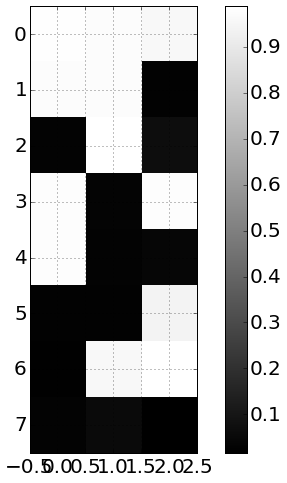

In [89]:
imshow(h,interpolation='nearest',cmap=cm.gray)
colorbar()

In [34]:
weights_xh,weights_hy=C.layers_coef_

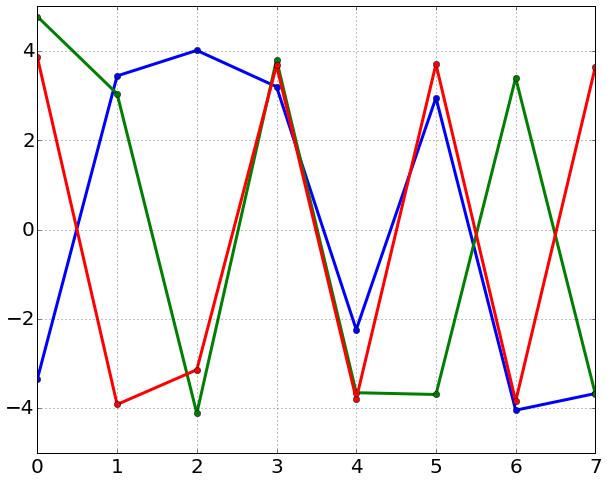

In [35]:
plot(weights_xh,'-o')

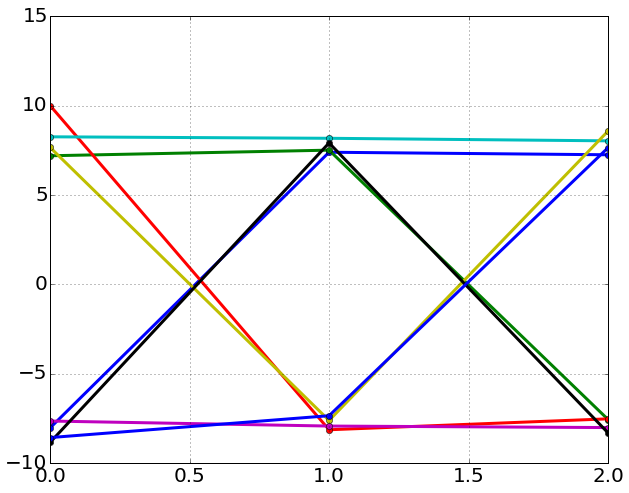

In [36]:
plot(weights_hy,'-o')

## Tuning the number of hidden units

In [37]:
data=load_excel('data/iris.xls')
data_train,data_test=split(data,test_size=0.75)

iris.data 151 5
150 vectors of length 4
Feature names: 'petal length in cm', 'petal width in cm', 'sepal length in cm', 'sepal width in cm'
Target values given.
Target names: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
Mean:  [ 3.75866667  1.19866667  5.84333333  3.054     ]
Median:  [ 4.35  1.3   5.8   3.  ]
Stddev:  [ 1.75852918  0.76061262  0.82530129  0.43214658]
Original vector shape:  (150, 4)
Train vector shape:  (37, 4)
Test vector shape:  (113, 4)


select which number of hidden units to use

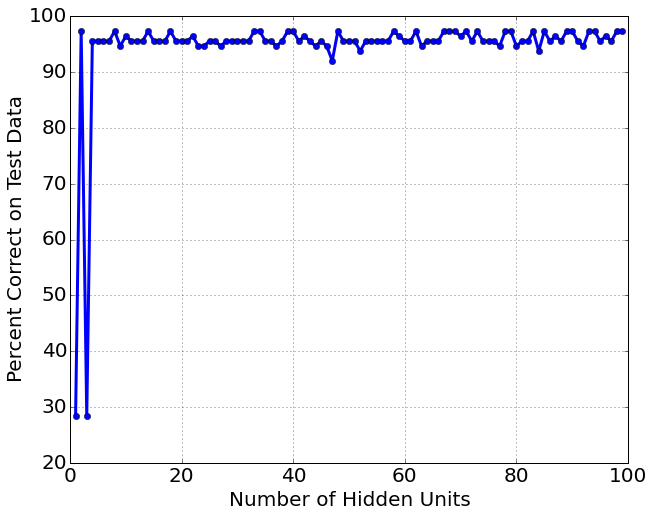

In [38]:
hidden=range(1,100)
percent_correct=[]
for n in hidden:
    C=BackProp(hidden_layer_sizes = [n])
    C.fit(data_train.vectors,data_train.targets)
    percent_correct.append(C.percent_correct(data_test.vectors,data_test.targets))
    
plot(hidden,percent_correct,'-o')
xlabel('Number of Hidden Units')
ylabel('Percent Correct on Test Data')